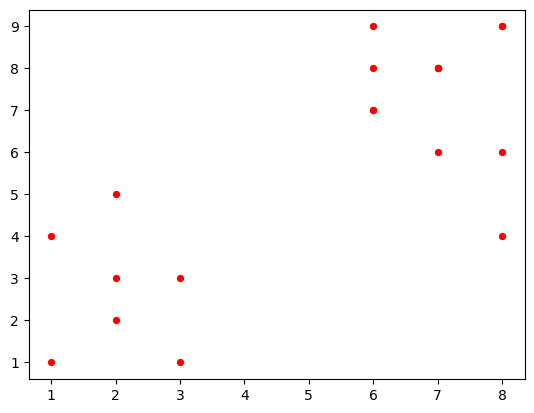

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("kmeans.csv")
plt.scatter(df['x'], df['y'], c='r', s=18)

[[6. 2.]
 [4. 1.]
 [1. 2.]]


Text(0, 0.5, 'y')

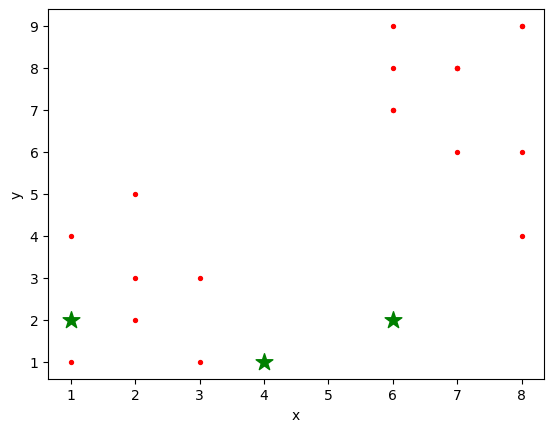

In [2]:
#---let k assume a value---
k = 3
#---create a matrix containing all points---
X = np.array(list(zip(df['x'], df['y'])))
#---generate k random points (centroids)---
Cx = np.random.randint(np.min(X[:,0]), np.max(X[:,0]), size = k)
Cy = np.random.randint(np.min(X[:,1]), np.max(X[:,1]), size = k)
#---represent the k centroids as a matrix---
C = np.array(list(zip(Cx, Cy)), dtype=np.float64)
print(C)
#---plot the orginal points as well as the k centroids---
plt.scatter(df['x'], df['y'], c='r', s=8)
plt.scatter(Cx, Cy, marker='*', c='g', s=160)
plt.xlabel("x")
plt.ylabel("y")

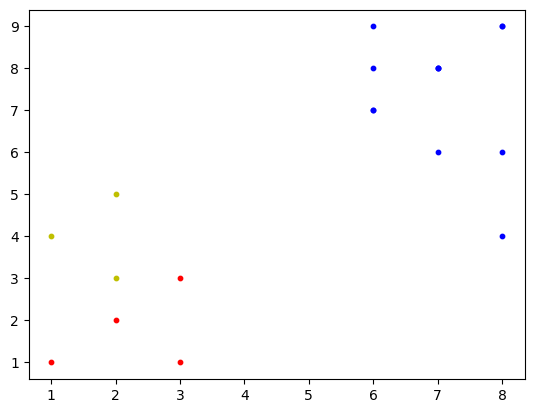

In [12]:
from copy import deepcopy

#---to calculate the distance between two points---
def euclidean_distance (a, b, ax=1):
    return np.linalg.norm (a - b, axis=ax)

#---create a matrix of 0 with same dimension as C (centroids) ---
C_prev= np.zeros(C. shape)

#---to store the cluster each point belongs to---
clusters = np.zeros(len(X))

#---C is the randon centroids and C prev is all 08---
#---measure the distance between the centroids and prev---
distance_differences = euclidean_distance (C, C_prev)

#---loop as long as there is still a difference in
# distance between the previous and current centroids---
while distance_differences.any() != 0:
    #---assign each value to its closest eluster---
    for i in range (len (X)):
        distances = euclidean_distance (X[i], C)

        #---returns the indices of the minimum values along an axis---
        cluster = np.argmin(distances)
        clusters [i] = cluster

    #---store the prev centroids---
    c_prev = deepcopy(C)

    #---find the new centroids by taking the average value---
    for i in range(k): #---k is the number of clusters---
        #take all the points in cluster i---
        points = [X[j] for j in range (len (X)) if clusters [j] == i]
        if len (points) != 0:
            C[i] = np.mean (points, axis=0)

    #---find the distances between the old centroids and the new centroids..
    distance_differences = euclidean_distance (C, c_prev)

#---plot the scatter plot---
colors= ['b', 'r', 'y','g', 'c', 'm']
for i in range (k):
    points= np.array([X[j] for j in range (len(X)) if clusters[j] == i])
    if len (points) > 0:
        plt.scatter(points[:, 0], points[:, 1], s=10, c=colors[i])
    else:
        # this means that one of the clusters has no points
        print("Please regenerate your centroids again.")
        plt.scatter(points[:, 0], points[:, 1], s=10, c=colors[1])
        plt.scatter(C[:, 0], C[:, 1], marker='*', s=100, c='black')

In [13]:
for i, clister in enumerate(clusters):
        print("Point " + str(X[i]), "Cluster " + str(int(cluster)))

Point [1 1] Cluster 0
Point [2 2] Cluster 0
Point [2 3] Cluster 0
Point [1 4] Cluster 0
Point [3 3] Cluster 0
Point [6 7] Cluster 0
Point [7 8] Cluster 0
Point [6 8] Cluster 0
Point [7 6] Cluster 0
Point [6 9] Cluster 0
Point [2 5] Cluster 0
Point [7 8] Cluster 0
Point [8 9] Cluster 0
Point [6 7] Cluster 0
Point [7 8] Cluster 0
Point [3 1] Cluster 0
Point [8 4] Cluster 0
Point [8 6] Cluster 0
Point [8 9] Cluster 0
